# HAR using VGG16

### Importing library

In [26]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [27]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Setting up the path and loading csv files

In [28]:
train_csv = pd.read_csv("M:\har\human activity\Training_set.csv")
test_csv = pd.read_csv("M:\har\human activity\Testing_set.csv")

In [35]:
train_fol = glob.glob("M:\har\human activity\train_files") 
test_fol = glob.glob("M:\har\human activity\test_files")

In [30]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [31]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [36]:
filename = train_csv['filename']

situation = train_csv['label']

In [37]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [38]:
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

# Creating a function to random take a image and display it with its label

In [42]:
def disp():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "M:\har\human activity\train_files/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

In [43]:
disp()

File Path not found 
Skipping the file!!


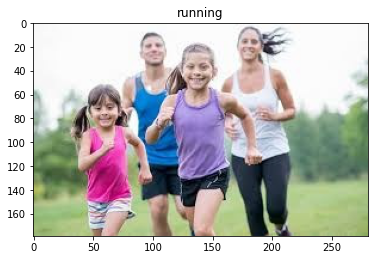

In [ ]:
disp()

In [44]:
disp()

File Path not found 
Skipping the file!!


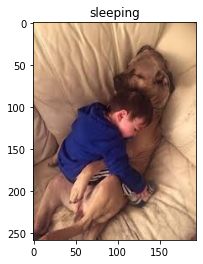

In [ ]:
disp()

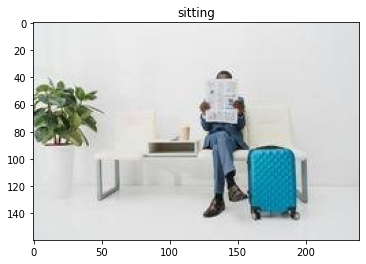

In [ ]:
disp()

# Processing data

In [ ]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [ ]:
inp_shape = (160, 160,3)

In [ ]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# dir(tf.keras.applications)

In [ ]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

2022-06-23 05:45:10.339053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 05:45:10.343727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 05:45:10.344457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 05:45:10.345558: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7695      
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = vgg_model.fit(iii,y_train, epochs=60)

2022-06-23 05:45:14.074679: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 967680000 exceeds 10% of free system memory.
2022-06-23 05:45:15.081935: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 967680000 exceeds 10% of free system memory.
2022-06-23 05:45:15.782986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-06-23 05:45:17.274746: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


394/394 [==============================] - 23s 36ms/step - loss: 2.1531 - accuracy: 0.4467
Epoch 2/60
394/394 [==============================] - 13s 33ms/step - loss: 1.2144 - accuracy: 0.6120
Epoch 3/60
394/394 [==============================] - 13s 33ms/step - loss: 0.9427 - accuracy: 0.6863
Epoch 4/60
394/394 [==============================] - 13s 33ms/step - loss: 0.7251 - accuracy: 0.7583
Epoch 5/60
394/394 [==============================] - 13s 33ms/step - loss: 0.5484 - accuracy: 0.8188
Epoch 6/60
394/394 [==============================] - 13s 33ms/step - loss: 0.4027 - accuracy: 0.8677
Epoch 7/60
394/394 [==============================] - 13s 33ms/step - loss: 0.2963 - accuracy: 0.9037
Epoch 8/60
394/394 [==============================] - 13s 33ms/step - loss: 0.2174 - accuracy: 0.9320
Epoch 9/60
394/394 [==============================] - 13s 33ms/step - loss: 0.1834 - accuracy: 0.9407
Epoch 10/60
394/394 [==============================] - 13s 33ms/step - loss: 0.1506 - accurac

In [ ]:
vgg_model.save_weights("model.h5")

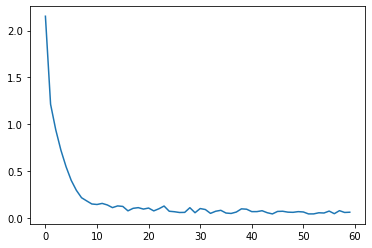

In [ ]:
losss = history.history['loss']
plt.plot(losss)

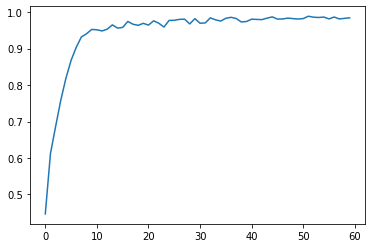

In [ ]:
accu = history.history['accuracy']
plt.plot(accu)

# Custom Testing

In [ ]:
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))

In [ ]:
# Function to predict

def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

probability: 98.98988604545593%
Predicted class :  4


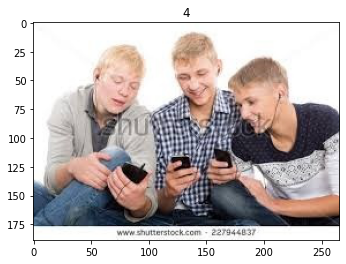

In [ ]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1010.jpg')

probability: 99.9929666519165%
Predicted class :  4


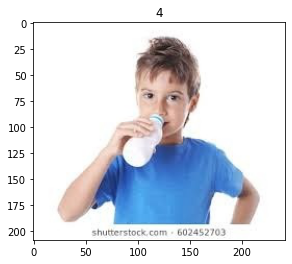

In [ ]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_101.jpg')

probability: 99.77114200592041%
Predicted class :  1


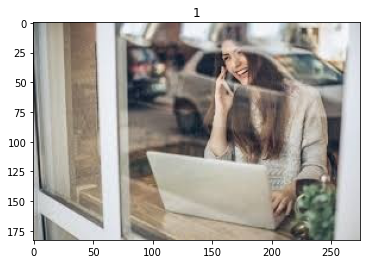

In [ ]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1050.jpg')